In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
#1A
df = pd.read_csv('column_2C_weka.csv')

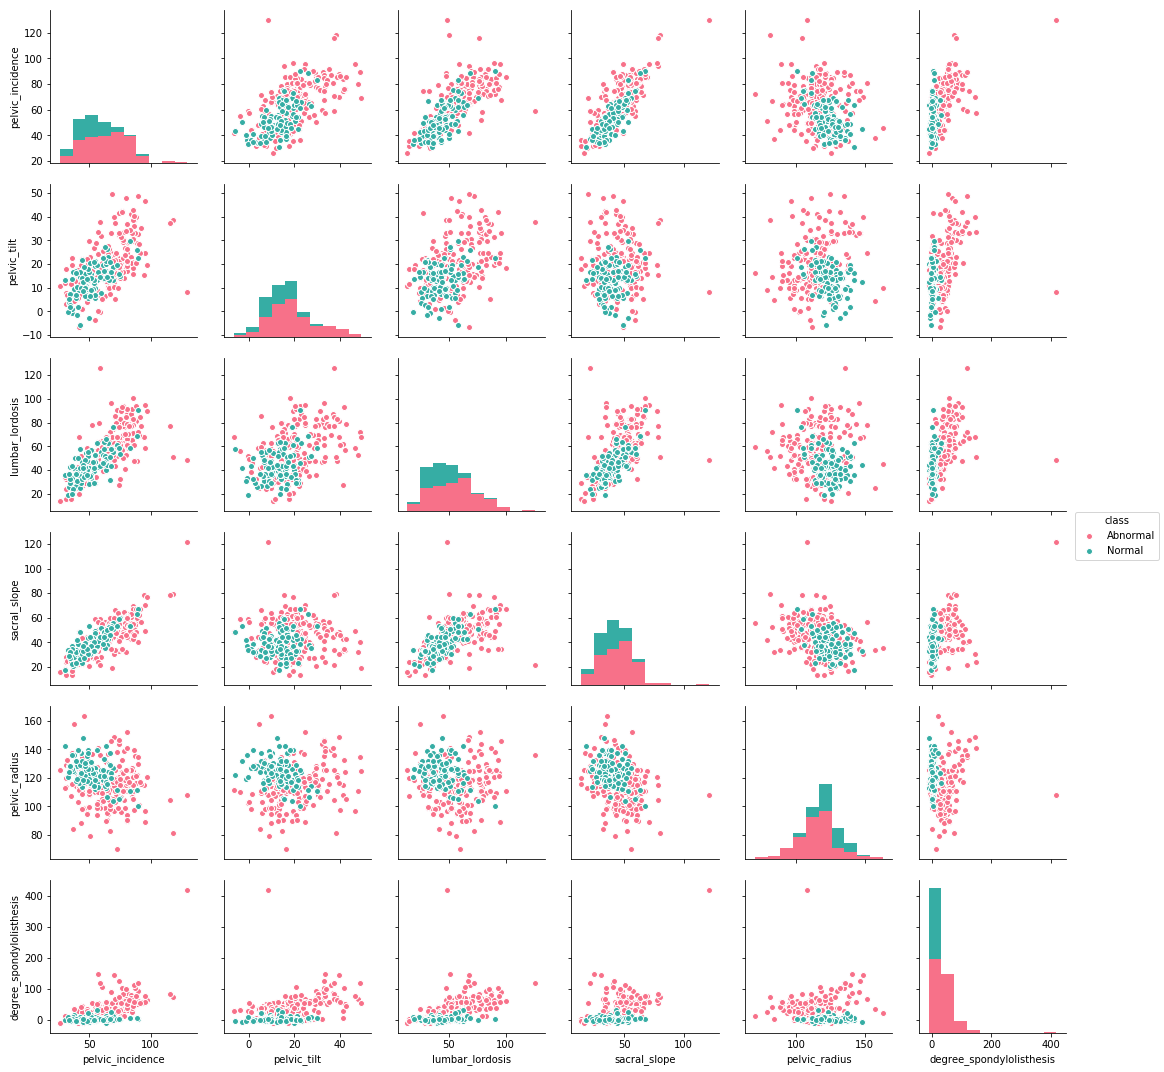

In [301]:
#1B
scatterplot = sns.pairplot(data = df,hue="class",palette = "husl")

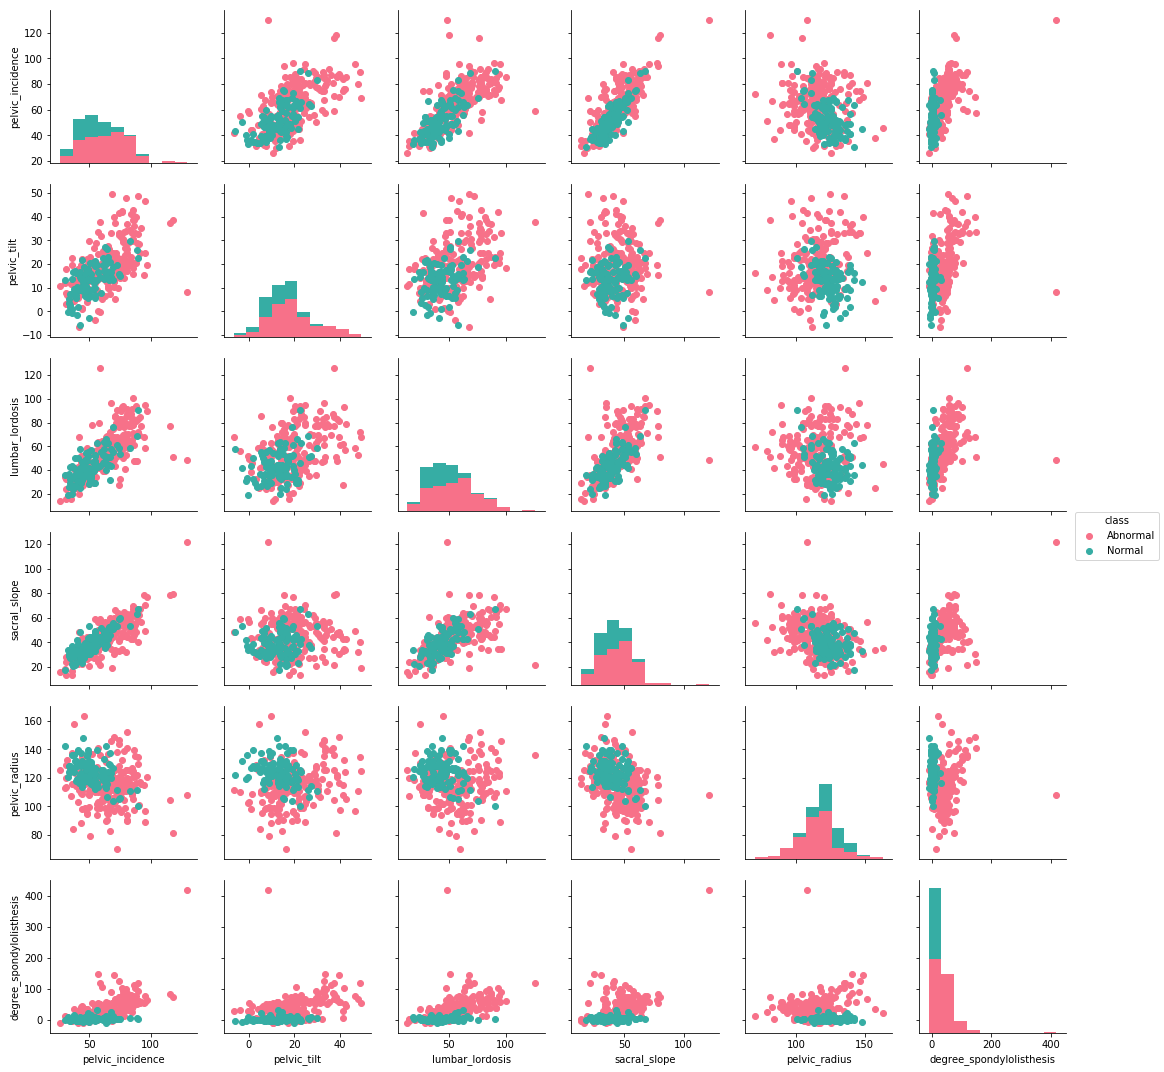

In [302]:
scatterplot = sns.PairGrid(data =df, hue = "class", palette = "husl")
scatterplot = scatterplot.map_diag(plt.hist)
scatterplot = scatterplot.map_offdiag(plt.scatter)
scatterplot.add_legend()

scatterplot for 6 independent variables using seaborn, showing each independent variable vs each of the other independent variables — all in relation to its class of normal or abnormal.

One graph uses seaborn pairplot while the other uses PairGrid - yet they both yield the same results.


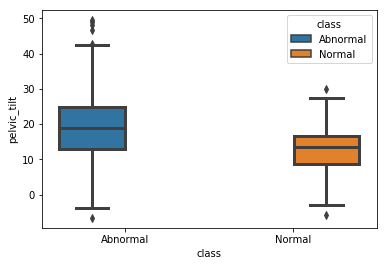

In [304]:
boxplot = sns.boxplot(x = 'class', y = 'pelvic_tilt', hue = 'class', data = df, linewidth = 3)

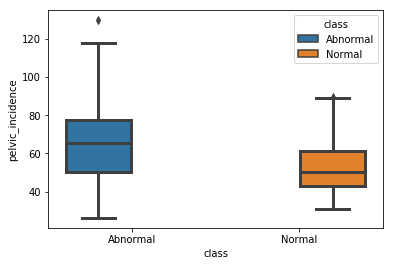

In [155]:
boxplot = sns.boxplot(x = 'class', y = 'pelvic_incidence', hue = 'class', data = df, linewidth = 3)

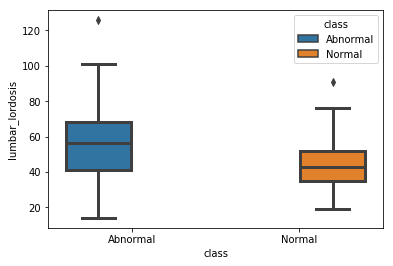

In [8]:
boxplot = sns.boxplot(y = 'lumbar_lordosis', x = 'class', hue = 'class', data = df, linewidth = 3)

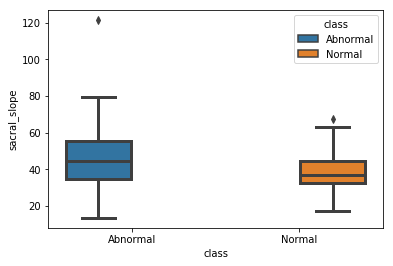

In [9]:
boxplot = sns.boxplot(x = 'class', y = 'sacral_slope', hue = 'class', data = df, linewidth = 3 )

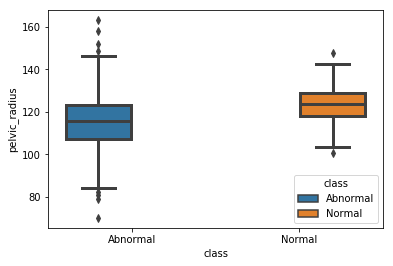

In [10]:
boxplot = sns.boxplot(x = 'class', y = 'pelvic_radius', hue = 'class', data = df, linewidth = 3 )

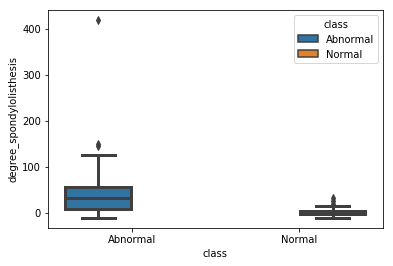

In [158]:
boxplot = sns.boxplot(x = 'class', y = 'degree_spondylolisthesis', hue = 'class', data = df, linewidth = 3)

Each boxplot shows an independent variable value as a function of its class. This can potentially show if one independent variable in specific (or more so than other independent variables), can determine the class label.

In [165]:
df = pd.read_csv('column_2C_weka.csv')

df['class'] = df['class'].map({'Abnormal': 1, 'Normal': 0})

df1 = df.loc[df['class'] == 0]
df2 = df.loc[df['class'] == 1]

df1a = df1.iloc[0:70,:]
df2a = df2.iloc[0:140,:]

X_full = pd.concat([df1a,df2a])
X_train = X_full.iloc[:,0:6]

y_train = X_full.iloc[:,-1]

df1b = df1.iloc[70:100,:]
df2b = df2.iloc[140:210,:]

X_fully = pd.concat([df1b,df2b])
X_valid = X_fully.iloc[:,0:6]

y_valid = X_fully.iloc[:,-1]

class label is 'normal' and 'abmnormal' - encode into 0 and 1
map function will map the column value to your chosen value
split into 2 seperate dataframes: df1 - 0 and df2 - 1, .loc dataframe of rows where class = 0 and class = 1
df1a will be 70 rows of df1 and df2a will be 140 rows of df2 - then join together for X_train
.iloc access groups of rows and columns by integer positions
join together - and then remove class label for X_train via slicing .iloc
take combination - and then select exclusively class label for y_train
df1b will be 30 of df1 and df2b will be 70 of df2 - then join together for X_valid
join together - and then remove class label for X_valid
take combination - and then select class label for y_valid 


lowest error [0.0]
lowest error other way 0.0
most suitable k* :  1


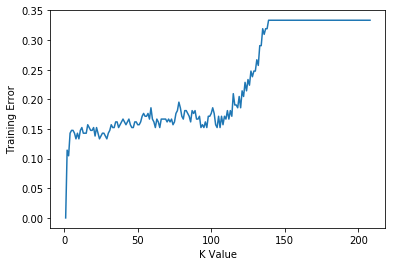

In [166]:
#1C

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

k_range2 = range(208,0,-1)
accuracy2 = []

for k in k_range2:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    score = knn.score(X_train,y_train)
    accuracy2.append(score)

error2 = [1 - x for x in accuracy2]

plt.plot(k_range2,error2)
plt.ylabel('Training Error')
plt.xlabel('K Value')


start = 10000
list = []
for number in error2:
    if number < start:
        start = number
list.append(number)

print('lowest error', list)
print('lowest error other way', min(error2))
suitable_k2 = k_range2[error2.index(min(error2))]
print('most suitable k* : ', suitable_k2)


Most suitable k* value is the value in which training error is lowest: which is 0 at a k value of 1. This makes logical sense because when k=1, the KNN algorithm will be selecting the actual independent variable from the training set.

lowest error [0.06000000000000005]
lowest error other way: 0.06000000000000005
most suitable k*: 4


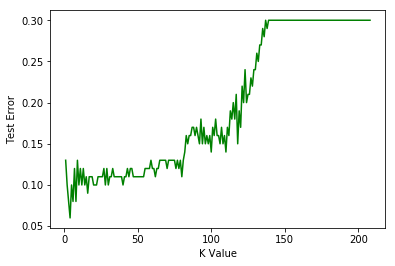

In [167]:
k_range = range(208,0,-1)
accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    prediction_test = knn.predict(X_valid)
    accuracy.append(accuracy_score(prediction_test,y_valid))

error = [1 - x for x in accuracy]

plt.plot(k_range,error, color = 'green')
plt.ylabel('Test Error')
plt.xlabel('K Value')

start = 100000
best_score = []
for score in error:
    if score < start:
        start = score
best_score.append(start)

print('lowest error', best_score) 
print('lowest error other way:', min(error))
suitable_k = k_range[error.index(min(error))]
print('most suitable k*:',suitable_k)


Most suitable k* value is the value in which test error is lowest: which is 0.06000000000000005 at a k value of 4. After that as k decreases it overfits and variance increases too much.

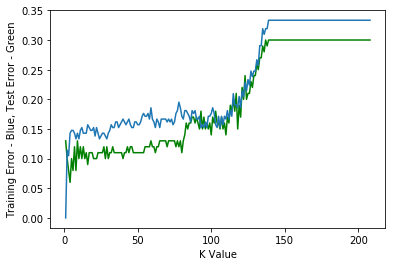

In [168]:
plt.plot(k_range,error, color = 'green')
plt.xlabel('K Value')
plt.ylabel('Training Error - Blue, Test Error - Green')
plt.plot(k_range2,error2)

With test error, after K = 4, it overfits and therefore test error goes up. For training error, of course it will continue to decrease until it gets to 1.

In [164]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)
prediction_test = knn.predict(X_valid)

print('confustion matrix:', '\n', confusion_matrix(prediction_test,y_valid))
print(classification_report(prediction_test,y_valid))
   

confustion matrix: 
 [[25  1]
 [ 5 69]]
             precision    recall  f1-score   support

          0       0.83      0.96      0.89        26
          1       0.99      0.93      0.96        74

avg / total       0.95      0.94      0.94       100



In [ ]:
#Good precision and recall scores, high absence of type I error and type II error

confustion matrix: 
 [[25  1]
 [ 5 69]]
             precision    recall  f1-score   support

          0       0.83      0.96      0.89        26
          1       0.99      0.93      0.96        74

avg / total       0.95      0.94      0.94       100

lowest test error rate 0.08999999999999997


Text(0,0.5,'Best Test Error Rate')

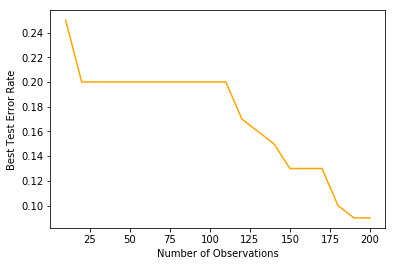

In [295]:
knn_range = range(1,196,5)
accuracy_N = []
bestKforN = []
errorList = []
n_range = range(10,210,10)

for number in n_range:
    for k in knn_range:
        if k <= number:
            n0 = int(number/3)
            n1 = int(number - n0)
            training_0 = df1.iloc[0:n0,:]
            training_1 = df2.iloc[0:n1,:]
            X_t = pd.concat([training_0,training_1])
            X_train = X_t.iloc[:,0:6]
            y_train = X_t.iloc[:,-1]
            knn = KNeighborsClassifier(n_neighbors = k)
            knn.fit(X_train,y_train)
            prediction_test = knn.predict(X_valid)
            accuracy_N.append(accuracy_score(prediction_test,y_valid))
            error_N = [1-x for x in accuracy_N]
    errorList.append(min(error_N))
    opt_k = knn_range[errorList.index(min(error_N))]
    bestKforN.append(opt_k)
                  
print('lowest test error rate', min(errorList))
plt.plot(n_range, errorList, color = 'orange')
plt.xlabel('Number of Observations')
plt.ylabel('Best Test Error Rate')


lowest test error rate 0.08999999999999997

As number of observations increase, this provides the knn algorithm with more data points, and so it will more accurately classify unseeen data, as the learning curve shows.

lowest error 0.10999999999999999
most suitable k = 6


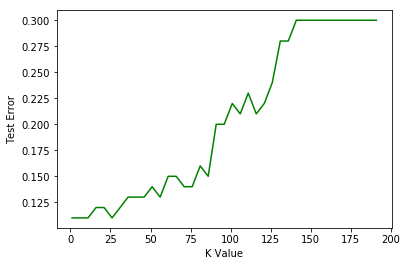

In [268]:
#1D

X_full = pd.concat([df1a,df2a])
X_train = X_full.iloc[:,0:6]
y_train = X_full.iloc[:,-1]
df1b = df1.iloc[70:100,:]
df2b = df2.iloc[140:210,:]
X_fully = pd.concat([df1b,df2b])
X_valid = X_fully.iloc[:,0:6]
y_valid = X_fully.iloc[:,-1]

k_range20 = range(1,196,5)
accuracy_metric = []

for k in k_range20:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 1)
    knn.fit(X_train,y_train)
    prediction_test = knn.predict(X_valid)
    accuracy_metric.append(accuracy_score(prediction_test,y_valid))

error_dia = [1 - x for x in accuracy_metric]

plt.plot(k_range20,error_dia, color = 'green')
plt.ylabel('Test Error')
plt.xlabel('K Value')

print('lowest error', min(error_dia))

print('most suitable k = 6')


Minimum test error which is 0.10999999999999999, chose k = 6, could have chosen lower k value but as professor said we want to avoid overfitting.

In [219]:
import numpy as np

p_list = []
dib_scores = []

log_range = np.linspace(.1,1,10)
for number in log_range:
    answer = 10**(number)
    p_list.append(answer)
    print(number)
print(p_list)

for p_value in p_list:
    knn = KNeighborsClassifier(n_neighbors = 1, p = p_value)
    knn.fit(X_train,y_train)
    prediction_test = knn.predict(X_valid)
    dib_scores.append(accuracy_score(prediction_test,y_valid))

error_dib = [1 - x for x in dib_scores]
print(error_dib)

suitable_p = p_list[error_dib.index(min(error_dib))]
print('suitable p' , suitable_p)
print('lowest error', min(error_dib))



0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0
[1.2589254117941673, 1.5848931924611136, 1.9952623149688797, 2.51188643150958, 3.1622776601683795, 3.9810717055349722, 5.011872336272724, 6.309573444801933, 7.943282347242816, 10.0]
[0.13, 0.13, 0.13, 0.14, 0.14, 0.12, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999]
suitable p 5.011872336272724
lowest error 0.10999999999999999


Best suitable log10p 0.7 (it actually changes between .7,.8,.9, and 1 which makes sense)

lowest test error 0.07999999999999996
[0.13, 0.09999999999999998, 0.12, 0.07999999999999996, 0.10999999999999999, 0.12, 0.12, 0.09999999999999998, 0.13, 0.12, 0.12, 0.12, 0.14, 0.13, 0.14, 0.10999999999999999, 0.14, 0.12, 0.15000000000000002, 0.14, 0.18999999999999995, 0.18000000000000005, 0.18000000000000005, 0.18000000000000005, 0.20999999999999996, 0.20999999999999996, 0.25, 0.28, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
most suitable k: 16


Text(0.5,0,'K Value')

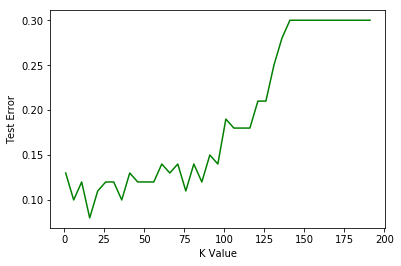

In [240]:
k_range = range(1,196,5)
cheb = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'chebyshev')
    knn.fit(X_train,y_train)
    prediction_test = knn.predict(X_valid)
    cheb.append(accuracy_score(prediction_test,y_valid))

error_cheb = [1 - x for x in cheb]
print('lowest test error', min(error_cheb))
print(error_cheb)

suitable_k_cheb = k_range[error_cheb.index(min(error_cheb))]
print('most suitable k:',suitable_k_cheb)

plt.plot(k_range,error_cheb, color = 'green')
plt.ylabel('Test Error')
plt.xlabel('K Value')



Lowest test error is .08999999999999997

In [244]:
X_full = pd.concat([df1a,df2a])
X_train = X_full.iloc[:,0:6]
y_train = X_full.iloc[:,-1]
df1b = df1.iloc[70:100,:]
df2b = df2.iloc[140:210,:]
X_fully = pd.concat([df1b,df2b])
X_valid = X_fully.iloc[:,0:6]
y_valid = X_fully.iloc[:,-1]


k_range10 = range(1,196,5)
accuracy_mahal = []

for k in k_range10:
    knn = KNeighborsClassifier(n_neighbors = k, algorithm = 'brute', metric = 'mahalanobis', metric_params = {'V': np.cov(X_train)})
    knn.fit(X_train,y_train)
    prediction_test = knn.predict(X_valid)
    accuracy_mahal.append(accuracy_score(prediction_test,y_valid))



error_mahal = [1 - x for x in accuracy_mahal]
print(error_mahal)

#lowest error 
print('lowest error', min(error_mahal))

print('most suitable k: k = 6')

[0.15000000000000002, 0.15000000000000002, 0.16000000000000003, 0.16000000000000003, 0.18000000000000005, 0.18999999999999995, 0.19999999999999996, 0.18999999999999995, 0.20999999999999996, 0.19999999999999996, 0.24, 0.21999999999999997, 0.21999999999999997, 0.19999999999999996, 0.20999999999999996, 0.20999999999999996, 0.22999999999999998, 0.25, 0.21999999999999997, 0.24, 0.24, 0.25, 0.24, 0.25, 0.26, 0.27, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
lowest error 0.15000000000000002
most suitable k: k = 6


Again, don't choose k =1, that can lead to overfitting. So instead choose k = 6.

In [292]:
dataa = {'test error': [min(error_dia),min(error_cheb),min(error_mahal)], 'k_value': [6,16,6]}
data = pd.DataFrame(data = dataa)
data = pd.DataFrame(data = dataa, index =['manhattan', 'chebyshev','mahalanobis'])
data

,test error,k_value
manhattan,0.11,6
chebyshev,0.08,16
mahalanobis,0.15,6


lowest error 0.09999999999999998
most suitable k: 6


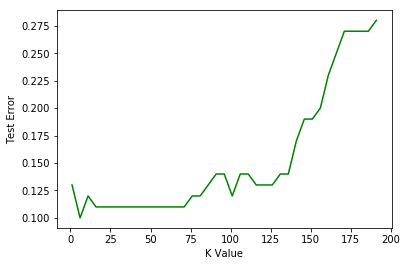

In [294]:
#1E

k_range = range(1,196,5)
accuracy_euc = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    knn.fit(X_train,y_train)
    prediction_test = knn.predict(X_valid)
    accuracy_euc.append(accuracy_score(prediction_test,y_valid))

error_euc = [1 - x for x in accuracy_euc]
plt.plot(k_range,error_euc, color = 'green')
plt.ylabel('Test Error')
plt.xlabel('K Value')

print('lowest error', min(error_euc))
suitable_k = k_range[error_euc.index(min(error_euc))]
print('most suitable k:',suitable_k)

lowest error 0.09999999999999998
most suitable k: 6

lowest error 0.09999999999999998
most suitable k: 26


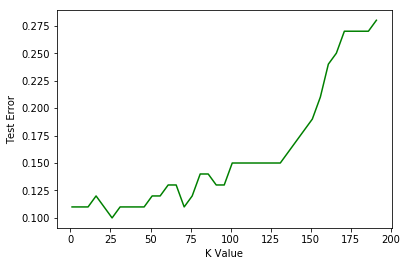

In [40]:
k_range5 = range(1,196,5)
accuracy_manhattan = []

for k in k_range5:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan', p = 1, weights = 'distance')
    knn.fit(X_train,y_train)
    prediction_test = knn.predict(X_valid)
    accuracy_manhattan.append(accuracy_score(prediction_test,y_valid))

error_manhattan = [1 - x for x in accuracy_manhattan]

plt.plot(k_range,error_manhattan, color = 'green')
plt.ylabel('Test Error')
plt.xlabel('K Value')

print('lowest error', min(error_manhattan))
suitable_k = k_range5[error_manhattan.index(min(error_manhattan))]
print('most suitable k:',suitable_k)

Interestingly, same minimum test error yet k value is higher, this means after k = 26, the data starts to overfit and have too much variance. This is clearly due to how they measure the distance between points.

lowest error 0.10999999999999999
most suitable k: 16


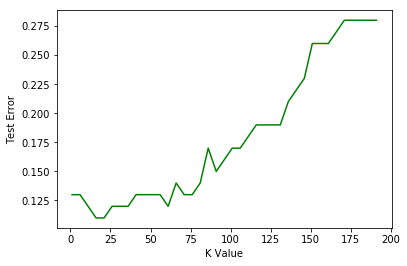

In [203]:
k_range6 = range(1,196,5)
accuracy_cheby = []

for k in k_range6:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'chebyshev', weights = 'distance')
    knn.fit(X_train,y_train)
    prediction_test = knn.predict(X_valid)
    accuracy_cheby.append(accuracy_score(prediction_test,y_valid))

error_cheby = [1 - x for x in accuracy_cheby]

plt.plot(k_range,error_cheby, color = 'green')
plt.ylabel('Test Error')
plt.xlabel('K Value')

print('lowest error', min(error_cheby))
suitable_k = k_range6[error_cheby.index(min(error_cheby))]
print('most suitable k:',suitable_k)

#1F lowest error - euclidian cii - 0.06000000000000005